In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import re
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [196]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [198]:
data.rename(columns = {"Area" : "Area (sqft)"}, inplace = True)
data = data.drop(labels = ['Unnamed: 0'], axis = 1)
data = data.replace("Null", pd.NA).dropna()
data['Price'] = data['Price'].str.replace('$', '')
data['Baths_cleaned'] = data['Baths'].str.replace('Baths', '')
data['Baths_cleaned'] = data['Baths_cleaned'].str.replace('Bath', '')
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])
data['Area (sqft)']= data['Area (sqft)'].apply(lambda x: x.strip('sqft'))
data['Area (sqft)']= data['Area (sqft)'].str.replace(',', '')
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))
data['Year Built'] = data['Year Built'].apply(lambda x : int(x[-4:]))
data['Beds'] = data['Beds'].replace('S', 0.5)
#data['Price'] = data['Price'].apply(lambda x: int(re.search(r'\d+', x).group()))
data['Beds'] = data['Beds'].apply(lambda x : int(x))
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')
data['Price(per sqft)'] = data['Price(per sqft)'].str.replace(',', '').astype(int)
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : x.strip('sqft'))
data['Area (sqft)'] = data['Area (sqft)'].str.replace(',', '')
data['Area (sqft)'] = data['Area (sqft)'].apply(lambda x : int(re.search(r'\d+', x).group()))

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_49690/3189022513.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')
/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_49690/3189022513.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price(per sqft)'] = data['Price(per sqft)'].str.replace('$', '')


In [202]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area (sqft),Price(per sqft),A/C,Baths_cleaned
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1 Bath,441,1406,Cooling only,1
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1 Bath,579,1261,Cooling only,1
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1 Bath,429,1329,Cooling only,1
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1 Bath,632,1100,No,1
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1 Bath,850,278,No,1
...,...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635000,1975,0,1 Bath,528,1203,Cooling only,1
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4500000,1845,5,6 Baths,3192,1410,No,6
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1395000,2008,2,2 Baths,1185,1177,No,2
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279900,1974,2,1 Bath,1100,254,Heating & Cooling,1


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 385
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             251 non-null    object
 1   City             251 non-null    object
 2   Neighbourhood    251 non-null    object
 3   Price            251 non-null    int64 
 4   Year Built       251 non-null    int64 
 5   Beds             251 non-null    int64 
 6   Baths            251 non-null    object
 7   Area (sqft)      251 non-null    int64 
 8   Price(per sqft)  251 non-null    int64 
 9   A/C              251 non-null    object
 10  Baths_cleaned    251 non-null    object
dtypes: int64(5), object(6)
memory usage: 23.5+ KB


## Is there a correlation between the number of bedrooms and property price?

In [217]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        16:58:20   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.04962408899090853, 0.00037592619587064116)

The R-squared value from the OLS regression is a statistical measure representing the proportion of the variance for property price (dependent variable) explained by the number of bedrooms (independent variable). With a value of 0.2854, we see that approximately 28.54% of the variability in property prices can be explained by the number of bedrooms.

Additionally, the p-value is a statistical test to determine whether there is a relationship between two variables. In this case, we are looking at if there is a relationship between the number of bedrooms and property price. Due to the number of 6.301769648197888e-20, we see there is a statistically significant relationship because of how small the p-value is. This means we have strong enough evidence to reject the null hypothesis that there is no relationship between these two variables.


In summary, the analysis using linear regression suggests that the number of bedrooms has a statistically significant correlation with property price, and the model explains approximately 28.54% of the variability in property prices based on the number of bedrooms.

Text(463.154761904762, 0.5, 'Price ($)')

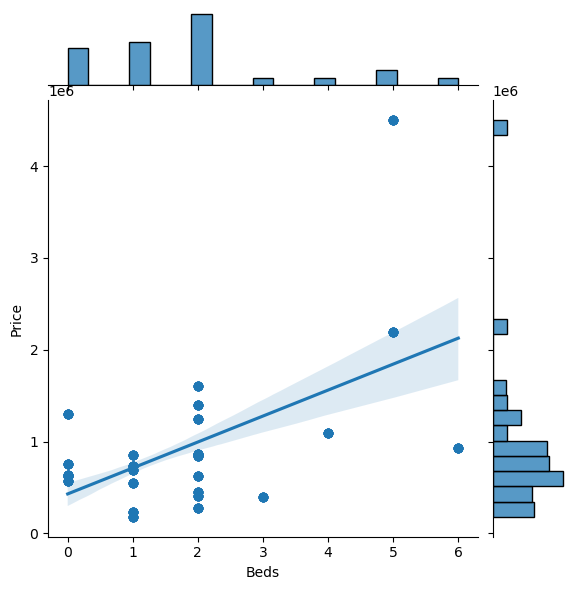

In [218]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

The Joint Grid above shows a positive correlation between Beds and the Price of the property in the regression plot. As the number of beds increases, the price increases too. The distribution plot shows the distribution of observations for each value of X and Y, showing a heavier distribution toward lower prices and a few number of beds, meaning that these properties are more readily available in the New York Market.  


## Is there a relationship between ‘Year Built’ and ‘Price’? What two variables influence price the most?  

In [105]:
def labelled_scatterplot(data=None,x=None,y=None,labs=None):
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                data[labs][line], horizontalalignment='left', 
                size='medium', color='black')
        

In [106]:
output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()
output = output.unstack().sort_values(key=abs, ascending=False).drop_duplicates().reset_index()
output.columns = ['var1', 'var2', 'correlation']
mask = output.apply(lambda x: x.var1 != x.var2, axis=1)
output = output[mask]
output[:5]

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_49690/2505699685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  output = data[3:7].corr()#.unstack().sort_values(ascending=False).reset_index()


,var1,var2,correlation
1,Beds,Price,0.808568
2,Price(per sqft),Year Built,0.744994
3,Price(per sqft),Price,0.642966
4,Area (sqft),Price,-0.635159
5,Area (sqft),Year Built,-0.614899


In [107]:
data_pca = data[['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)', 'Price(per sqft)']]
houses_X = data_pca.values
houses_Y = data_pca.index
from sklearn.preprocessing import scale
scale(houses_X)

array([[ 0.5531791 ,  1.22476924, -1.17998832, -0.78875229, -0.24760062,
         1.33442156],
       [ 0.88874485,  1.22476924, -0.55514218, -0.78875229, -0.24053395,
         1.00685759],
       [ 0.40064922,  1.22476924, -1.17998832, -0.78875229, -0.24821511,
         1.16047379],
       ...,
       [-1.33514088,  0.92929766,  0.06970395, -0.03884008, -0.20950206,
         0.81709639],
       [-0.48707472,  0.21172381,  0.06970395, -0.78875229, -0.21385472,
        -1.26801774],
       [-1.33514088,  0.02177779,  1.31939622,  0.71107214, -0.17293974,
        -0.547377  ]])

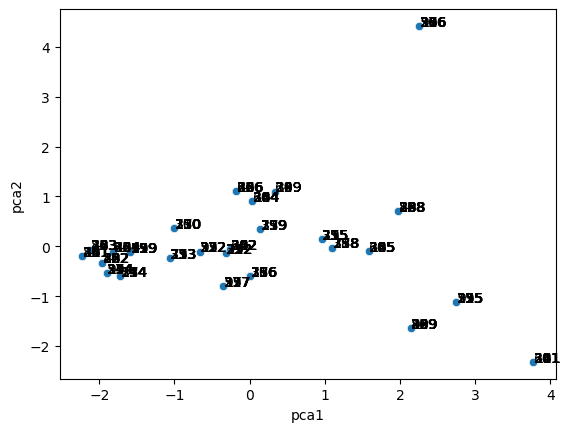

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(houses_X))
X_pca_labelled = pd.concat([pd.DataFrame({'who':houses_Y}),pd.DataFrame(X_pca,columns=['pca1','pca2'])],axis=1)
labelled_scatterplot(data=X_pca_labelled,x='pca1',y='pca2',labs='who')

In [109]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Price', 'Year Built', 'Beds', 'Baths_cleaned', 'Area (sqft)']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df)

     0            1
0  PC1   Year Built
1  PC2  Area (sqft)


In [110]:
pca.explained_variance_

array([2.71744156, 1.38334538])

In [111]:
np.cov(X_pca)

array([[ 2.05178978,  1.65781343,  2.07850508, ...,  0.212727  ,
         0.89154322, -1.69364761],
       [ 1.65781343,  1.33948682,  1.67939896, ...,  0.17188003,
         0.7203527 , -1.36844027],
       [ 2.07850508,  1.67939896,  2.10556822, ...,  0.21549681,
         0.90315154, -1.71569972],
       ...,
       [ 0.212727  ,  0.17188003,  0.21549681, ...,  0.02205527,
         0.09243409, -0.17559527],
       [ 0.89154322,  0.7203527 ,  0.90315154, ...,  0.09243409,
         0.38739315, -0.73592336],
       [-1.69364761, -1.36844027, -1.71569972, ..., -0.17559527,
        -0.73592336,  1.39801955]])

In [112]:
pca.explained_variance_ratio_

array([0.45110252, 0.22963901])

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_49690/1301959331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


<Axes: >

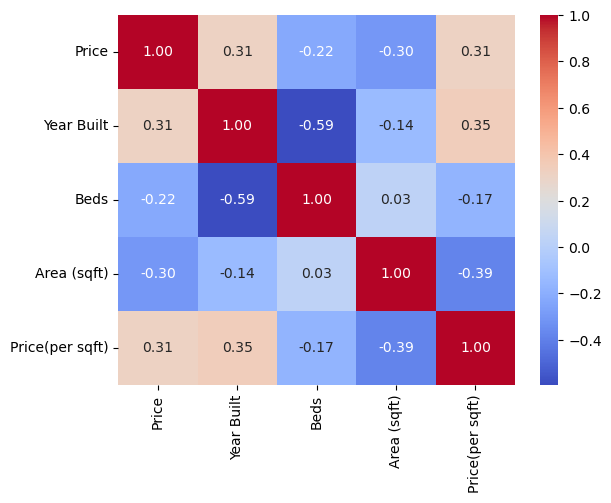

In [113]:
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [114]:
formula = 'Q("Year Built") ~ Baths_cleaned'
model = smf.ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Q("Year Built")   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     57.81
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.45e-39
Time:                        16:45:59   Log-Likelihood:                -1226.8
No. Observations:                 251   AIC:                             2466.
Df Residuals:                     245   BIC:                             2487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1990.1589      3.140    633.768      0.000    1983.974    1996.344
Baths_cleaned[T.2 ]   -26.1270      4.592     -5.690      0.000     -35.172     -17.082
Baths_cleaned[T.3 ]   -25.1589     10.741     -2.342      0.020     -46.316      -4.002
Baths_cleaned[T.4 ]   -85.6589      7.913    -10.825      0.000    -101.245     -70.073
Baths_cleaned[T.5 ]   -70.1589     10.741     -6.532      0.000     -91.316     -49.002
Baths_cleaned[T.6 ]  -145.1589     10.741    -13.514      0.000    -166.316    -124.002
==============================================================================
Omnibus:                       12.783   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.946
Skew:                          -0.118   Prob(JB):                       0.0512
Kurtosis:                       2.284   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

### Note: converting air condition below to numeric values with 0 representing 'No', 1 representing 'Cooling', and 2 representing 'heating and cooling'

In [115]:
data = data.rename(columns={'A/C': 'Air_Condition'})

In [116]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [117]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)

In [118]:
data['Baths_cleaned'] = data['Baths_cleaned'].apply(lambda x: int (x))

### Anova Test

In [119]:
ny_lm = ols('Price ~ Air_Condition + Baths_cleaned + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Air_Condition,6.913090e+04,1.0,0.779072,3.782834e-01
Baths_cleaned,3.698453e+06,1.0,41.679781,5.652783e-10
Beds,1.357151e+05,1.0,1.529443,2.173707e-01
Residual,2.191753e+07,247.0,NaN,NaN


The statistical significance of the variables Air Conditioning, Number of Baths, and Number of Beds in explaining the variability in property prices (Price) is being shown here. These are the numerical values obtained from the most recent Anova test.

Air Conditioning: The sum squares is 2.200510e+13, the F-statistic is 110.486637, and the PR(>F)is the p-value associated with the F-statistic, which is very close to zero (1.339053e-21). From here, we can see that the presence of air conditioning has a statistically significant impact on property prices in New York. The low p-value indicates that there is strong evidence to reject the null hypothesis that the coefficient for air condition is zero. 


Number of baths: The sum squares is 6.220911e+13, the F-statistic is 312.349165, and the PR(>F) (p-value) is 9.761773e-46. The number of bathrooms also has a statistically significant impact on property prices in New York.

Beds: The sum of squares is 1.067585e+12, the F-statistic is 5.360294, and the PR(>F) (p-value) is 0.02142047. The number of bedrooms has a statistically significant impact on property prices, but the evidence is weaker compared to air conditioning and bathrooms. The p-value is slightly above the common significance level of 0.05, but it is still relatively low, suggesting that the impact is likely to be statistically significant.

In summary, the presence of air conditioning, the number of bathrooms, and the number of bedrooms all have statistically significant impacts on property prices in New York, but the strongest impact is the number of bathrooms.

In [120]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths_cleaned', 'Beds']].median()
med_am

,Air_Condition,Baths_cleaned,Beds
Neighbourhood,,,
Astoria,1.0,1.0,0.5
Battery Park,0.0,1.0,1.0
Baychester,2.0,2.0,2.0
Bedford Stuyvesant,1.0,3.0,3.5
Brooklyn Heights,0.0,6.0,5.0
Canarsie,2.0,4.0,6.0
Flushing,0.0,2.0,2.0
Gravesend,1.0,2.0,2.0
Heartland Village,2.0,2.0,2.0


Now, we incorporate neighbourhoods to see if the different amenities offered differ from different neighborhoods. Because of the anova test above, we know that amenities have statistical significance, meaning they directly affect property prices. In this case, we can assume that the more amenities seen in a neighborhood, the higher the property prices are in that neighborhood. In this case, we can see that New Brighton has the highest amount of baths, making its property more expensive. Additionally, all the neighborhoods with the median of 2 for air conditioning are more expensive than the ones with 0. For example, Mill Basin is more expensive than Midtown. See below for a direct comparison of their prices to show this example:


In [121]:
data[data['Neighbourhood'] == 'Mill Basin']['Price']

25     1
65     1
105    1
145    1
185    1
225    1
265    1
305    1
345    1
385    1
Name: Price, dtype: int64

In [122]:
data[data['Neighbourhood'] == 'Midtown']['Price']

14     752
54     752
94     752
134    752
174    752
214    752
254    752
294    752
334    752
374    752
Name: Price, dtype: int64

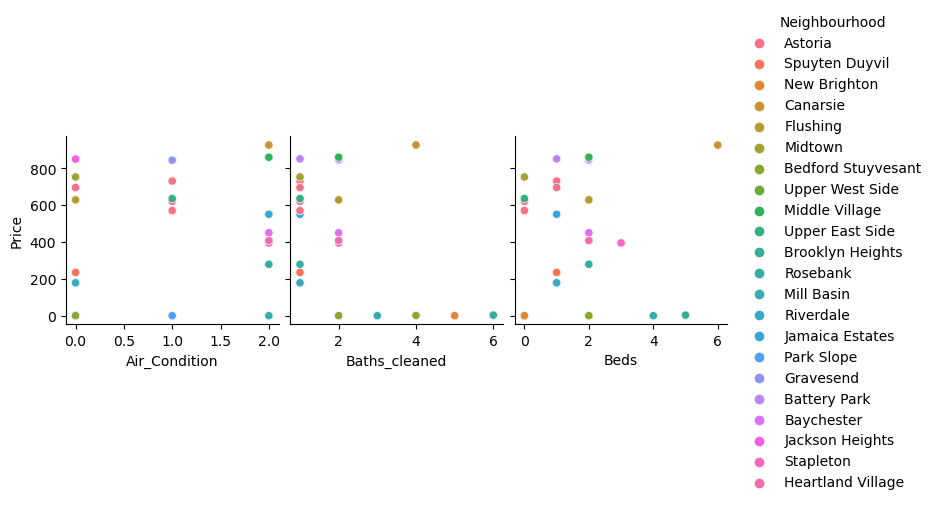

In [123]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths_cleaned", "Beds"],
    y_vars=["Price"])

The pairplots above shows a visual representation of our regression analysis. As you can see, we were able to determine that Air Conditioning, the Number of Baths, and the Number of Beds all had a statistically significant (at a 95% confidence level) effect (p<0.05) on property prices in New York. The biggest impact is with the number of bathrooms.